# Loops and numerical integration in Python


Last week we saw how to make `quiver` plots with `matplotlib` in a Python notebook. Today, we will see how to conduct numerical integration in Python.

***HEY YOU! PAY ATTENTION! There are several exercises for you to complete within this notebook. Don't miss 'em.***

## Loops

To program a numerical integration scheme (or most things), we need to review the concept of a loop. Loops are one of the most common ideas in programming. The basic idea is that instead of entering a command lots of times with slight variations, let the programming language loop over it a certain number of times while making slight changes each time on your behalf. For example, let's use the most common loop: a `for` loop. The idea is that `for` each thing in some list that you specify, Python runs some code for you. This is easier to understand with an example:

In [5]:
fruits = ["apple", "banana", "cherry"] # A list of fruit words
counter=0 #a counter to help understand loops

# Now we start a for loop. It must:
#    - use the for command to initiate it
#    - identify a variable that changes with each iteration (i in this case)
#    - identify a list-like variable to loop through (fruits in this case)
# Then we indent our code to indicate the code that is getting looped.
for i in fruits: # start a for loop
    counter=counter+1 # Add 1 to our counter, so we know we started a new loop
    print('I am a for loop. This is loop number {}.'.format(counter)) # Print some info
    print('My favorite fruit during this loop is {}.'.format(i)) # Use our loop variable


I am a for loop. This is loop number 1.
My favorite fruit during this loop is apple.
I am a for loop. This is loop number 2.
My favorite fruit during this loop is banana.
I am a for loop. This is loop number 3.
My favorite fruit during this loop is cherry.


A very useful function for loops is `range`. It makes a range of numbers that you can loop over. Suppose I want to square the integers from 0 to 5 and print the results. I could do this:

In [6]:
for i in range(0,6): # Loop i over the range 0 through 6.
    print(i**2)

0
1
4
9
16
25


Notice that my `range` command was `range(0,6)`, not `range(0,5)`. I need to do this because of how Python counts. I am telling it to give me 0 ***up to but not including*** 6.

`range` also can change the increment between values (for example, you can count by twos or threes instead of by ones), which is often very handy. Here's a quick example,

In [7]:
for i in range(0,10,3): # Loop i over the range 0 through 10 in increments of 3.
    print(i)

0
3
6
9


#### ***An exercise for you:*** Use the code cell below this one. By using a `for` loop and the `range` command, find a way to print the result of raising each integer to the power of the integer above it, and do so for 0 through 15. For example, the first line printed should give the result of $0^1$, the next should be $1^2$, then $2^3$, and so on, ending with $15^{16}$. Do ***not*** manually type these commands; start a loop and use a single line of code within it. Make sure your code gives the expected results.

In [8]:
# Your loop code goes here!

## Numerical integrating functions of one variable
Now we will learn how to approximately determine the integral of a functions of a single variable using the trapezoidal rule and Simpson's rule. You will compare your results to the simplest built-in integrator from the ``scipy.integrate`` library, ``quad``. In this notebook, we have started by walking through the results of a computing numerically the integral of a function with known anti-derivative, but have left developing the Simpson alogorithm to you.

### Import all the libraries

We will start by importing all the libarries and functions that we need. These can be called upon in any cell, but it's often useful to call them up in the first cell, so you know what's available. Also, to avoid conflicts in namespaces (i.e., functions and methods that appear in multiple libraries), we will use the ``as`` method of importing libraries.

In [16]:
import sympy as sp                 ## Import symbolic python library
import numpy as np                 ## Import basic scientific computing library
import matplotlib.pyplot as plt    ## Import plotting library
from scipy.integrate import quad   ## Import a specific integrator from scipy.intergrate library

## Make sure our plots show up inline
%matplotlib inline

## Add some style to the printing of sympy functions
sp.init_printing(use_latex='mathjax')

# If equations aren't displaying right in Google Colab, uncommenting
# the following lines might fix it:
#def custom_latex_printer(exp,**options):
#    from google.colab.output._publish import javascript
#    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#    javascript(url=url)
#    return printing.latex(exp,**options) #this command may need to be modified depending on how you import sympy
#init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

### An example

We will work with a function with a known anti-derivative,

$$ g(x) = 10~e^{-x},$$

which are planning to integrate from 0 to 10,

$$I(0,10) = \int_0^{10} 10~e^{-x} dx.$$

Let's start by plotting this function to get an idea of what we'll be integrating. This bit of code also serves as a good example of making a basic plot in `matplotlib`, a skill which you will need later in this notebook.

We want to plot the function $10~e^{-x}$ from $x=0$ to $x=10$. Mathematically, this seems simple: just draw the part of the parabola over the infinite number of points from $x=0$ to $x=5$. But computers can't work in infinities; they break everything up into discrete, separate points. We need to think a little differently to use a computer to make such a plot. We need to make an array of $x$ values, evaluate them with $x^2$ to get the $y$ values, and then put all of those points on the screen. We'll use `numpy` to make an array of $x$ values.

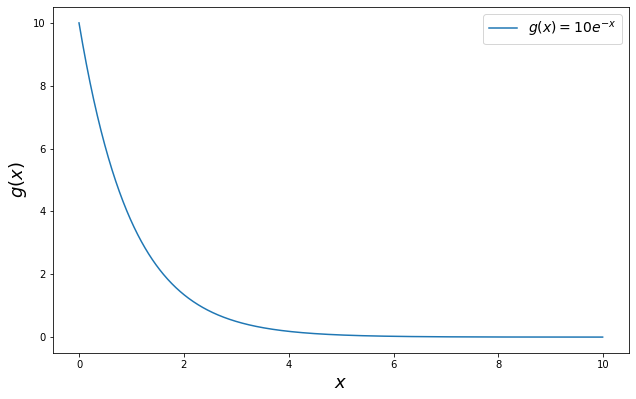

In [20]:
t = np.arange(0,10,0.01) # Create a numpy array over the range of interest to serve as our array of independent variables
g = 10*np.exp(-t)

fig_example_plot = plt.figure(figsize=(10,6)) # Make figure object

axes = fig_example_plot.add_axes([0.1, 0.1, 0.8, 0.8]) # Place axes
axes.plot(t, g, label="$g(x) = 10e^{-x}$") 
axes.legend(loc=1,fontsize=14); # Make legend in upper left corner. Location codes listed at http://matplotlib.org/users/legend_guide.html#legend-location
axes.set_xlabel(r"$x$",fontsize=18)
axes.set_ylabel(r"$g(x)$",fontsize=18);

Ok, great, we know what the function looks like. I said that this function has a known anti-derivative, letting us check our numerical integration. Let's find that anti-derivative. We could try to figure it out ourselves, or look it up, but we can just have Python find it with the ``sympy`` library. 

In [5]:
x=sp.Symbol('x') # Tell sympy to treat x as an algebraic symbol, not a normal Python variable
sp.integrate(10*sp.exp(-x),x) # do the integral

     -x
-10⋅ℯ  

In this case, the function has a known anti-derivative, so numerically finding the integral from 0 to 10 is not necessary. We can simply use the antiderivative to evaluate it at the end points and compute the integral,

$$I = -10~e^{-x}$$

So that,

$$I(0,10) = -10({e^{-10}-1}) \approx 9.9995460007$$

But let's see what happens when we numerically integrate it. We start by defining our function:

In [6]:
def g(t):
    return 10*np.exp(-t)

Now let's use the trapezoidal integration scheme that we implemented in class, this time with ten steps:

In [8]:
N = 10
a = 0
b = 10
h = (b-a)/N
s = 0       # this just ensures we don't add more to it if we run it again!

s = 0.5*g(a) + 0.5*g(b)
for k in range(1,N):
    s += g(a+k*h)
    
I = s*h
print(I)

10.819275852028298


That's, unsurprisingly, pretty bad, but it gets better with more steps:

In [12]:
N = 1000
a = 0
b = 10
h = (b-a)/N
s = 0       # this just ensures we don't add more to it if we run it again!

s = 0.5*g(a) + 0.5*g(b)
for k in range(1,N):
    s += g(a+k*h)
    
I = s*h
print(I)

9.999629330113484


That's only off by 0.0007%. We can keep doing this for a while, but at some point we are running too many iterations for the gain in precision. We will also run into the issue of machine precision, which is error inherent in the storing of floating point numbers in a computer.

There are better methods for numerical integration, which are inherently faster (fewer iterations for same or better precision) and/or adaptive to the problem (get you the best answer for your required precision). One of these is Gaussian quadrature, which the `quad` function from `scipy` performs:

In [13]:
I = quad(g, 0, 10)
print(I)

(9.999546000702377, 2.83275284251709e-13)


The first result is the integral result. 

## A better integration scheme

For most problems, we will want to use a better integration scheme than the trapezoidal approached. As I introduced in class, a simple choice is Simpson's rule, which uses a quadratic shape to approximate the function curvature at each integration step, as in the figure below. Notice that we want to think about **pairs** of integration slices, each of which will be fit to a quadratic function.

![vector fields](http://www.evantilton.com/ph410f19/images/hw2-simpson.jpg "vector fields") 

Let's figure out how to do this mathematically. Suppose we have three points we want to lie on a quadratic, and they lie at $x=-h, 0, +h$, as in this figure:

![vector fields](http://www.evantilton.com/ph410f19/images/hw2-simpsonslice.jpg "vector fields") 

A quadratic function is of the form $Ax^2+Bx+C$, where $A$, $B$, and $C$ are constants, so, by simply plugging in the three $x$ values, it must be that: $$f(-h)=Ah^2-Bh+C ~~~~~~~ f(0)=C ~~~~~~~ f(+h)=Ah^2+Bh+C.$$ These are three equations with three unknown constants, so we can solve the system of equations algebraically. Skipping through the algebra to the result, one can obtain: 
$$ C=f(0) ~~~~~ A=\frac{1}{h^2}\left[ \frac{1}{2}f(-h)-f(0)+\frac{1}{2}f(h)\right] ~~~~~ B=\frac{1}{2h}\left[f(h)-f(-h)\right].$$
Now we can analytically integrate this result to obtain the area under this quadratic approximation: $$\int_{-h}^h\left( Ax^2+Bx+c\right) dx=\frac{2}{3}Ah^3+2Ch=\frac{1}{3}h\left[ f(-h)+4f(0)+f(h)\right]$$
This result is Simpson's rule. Notice it depends on **only** the function at 3 equally-spaced points, so it is easy to evaluate computationally.

If we are doing a numerical integral with $N$ bins numbered as $k=1,2,...,N$, the approximate area of a **pair** of adjacent bins is therefore $${\rm Area}\approx\frac{1}{3}h\left[ f(-x_k)+4f(x_{k+1})+f(x_{k+2})\right],$$ and the total integral is the sum of these pairs:
$$I(a,b)\approx\frac{1}{3}h\left[ f(a)+4f(a+h)+f(a+2h)\right]+\frac{1}{3}h\left[ f(a+2h)+4f(a+3h)+f(a+4h)\right]+...+\frac{1}{3}h\left[ f(a+(N-2)h)+4f(a+(N-1)h)+f(b)\right].$$
We can clearn this up by collecting like terms:
$$I(a,b)\approx\frac{1}{3}h\left[ f(a)+4f(a+h)+2f(a+2h)+4f(a+3h)+...+f(b)\right].$$
Notice something **important** here. All of the function terms that are calculated at a location depending on an odd number of $h$s are multiplied by 4, and all of the even ones are multplied by 2. Therefore,
$$I(a,b)\approx\frac{1}{3}h\left[ f(a)+f(b)+4\sum^{N-1}_{k_{\rm odd}}f(a+kh)+2\sum^{N-2}_{k_{\rm even}}f(a+kh)\right].$$

This is now in a form that is easy to implement in Python. However, the loop (or loops?) have that odd alternating behaviour. There are a variety of ways of dealing with that, but it is sometimes helpful to remember a property of the `range()` function: it can take steps of sizes that are different from 1, like so:

In [15]:
N=10
for k in range(1,N,2): # starting at 1, take two steps at a time until N
    print(k, end = '')
print()
for k in range(2,N,2): # starting at 2, take two steps at a time until N
    print(k, end = '')

13579
2468


## An exercise: Numerically integrating functions without simple antiderivatives 

Up till now, most of your experience with integration has likely been integrating continuous functions that have anti-derivatives. In the real world, many continuous functions do not have anti-derivatives, including raw, discrete data (e.g., using individual laboratory measurements of position to determine potential energy). Let's therefore turn our attention to functions for which there are no simple anti-derivatives.

Consider a line of charge that lives on the x-axis. It exists from $x=0$ to $x=3$, and distribution of that charge is given by,

$$\lambda(x) = 2e^{-x^2}.$$

In this problem, you will determine the total charge one this line by performing the integral,

$$Q = \int_0^3 2e^{-x^2} dx.$$

Complete the exercises below, either within this notebook or in another Python file or files. **You may not already know how to do these things. My explanations in this notebook will get you most of the way there, but you may find yourself stuck. You need to realize that much of learning to implement problems in code is the seeking out of the necessary information and tools. You should begin to get used to Googling for Python documentation, Wikipedia descriptions of algorithms, and helpful questions on StackExchange. Your assignment is to figure out how to do these things.**

1. Plot the distribution of charge. Does it look familiar to you in some way? Maybe you've seen it in other classes?
2. Use ``sympy`` to compute the integral of the function (i.e., the total charge). What does it return? Discuss the function. Is it analytic?
3. Apply the trapezoidal rule to compute the integral of this function. Use 10 equal width steps. To receive full credit, you must write the code to do this and not use built-in integration functions of ``scipy``.
4. Apply Simpson's rule to compute the integral of this function. Again, use 10 equal with steps. Compare the result to part 3. To receive full credit, you must write the code to do this and not use built-in integration functions of ``scipy``.
5. Compute both integrals with increasingly more steps (i.e., from 10 to 100) and plot the results. That is, produce a figure to compare the results of your integration schemes. Your plot(s) should have number of steps on the horizontal axis and the value of the integral on the vertical axis.
6. Use the ``scipy.integrate`` built-in quadrature function, ``quad.`` Use it to compute the same integral and compare its result to what your code produced. What are the two variables that ``quad`` gives you by default?
7. Explain in plain English how the trapezoidal rule and Simpson's rule are different. How do they compute the integrals? Explain how the [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature) method, which is used in ``quad`` from the ``scipy.integrate`` library, is different from both of them.